In [1]:
import pandas as pd
import itables
from itables import downsample, options, sample_dfs
import itables.typing as typing


# Utilise le bon format de chemin (slashs ou chaîne brute)
df = pd.read_csv(r"C:\Users\saleban ali hassan\Documents\Projet_Moodify\csv\SpotifyFeatures.csv")



# === 1. Charger le fichier CSV ===


# === 2. Nettoyage du nom d'artiste pour éviter les problèmes d'espaces/casse/accents ===
df['artist_name'] = df['artist_name'].str.strip().str.casefold()

# === 3. Liste normalisée des artistes variété française ===
artistes_variete_francaise = [
    'jean-jacques goldman', 'michel sardou', 'francis cabrel', 'julien clerc',
    'claude françois', 'patrick bruel', 'michel delpech', 'véronique sanson',
    'joe dassin', 'charles aznavour', 'édith piaf', 'serge lama',
    'michel polnareff', 'daniel balavoine', 'alain souchon', 'laurent voulzy',
    'françoise hardy', 'gilbert bécaud', 'barbara', 'charles trenet',
    'hélène ségara', 'lââm', 'karen cheryl', 'emji', 'toma', 'georges brassens',
    'jacques brel', 'léo ferré', 'juliette gréco', 'boris vian', 'serge gainsbourg',
    'jean ferrat', 'yves montand', 'renaud', 'maxime le forestier', 'france gall',
    'michel berger', 'zazie', 'calogero', 'benabar', 'vincent delerm', 'zaz',
    'stromae', 'camille', 'christine and the queens', 'clara luciani', 'julien doré',
    'vianney', 'louane', 'hoshi', 'pierre de maere', 'pomme', 'lomepal',
    'gaël faye', 'eddy de pretto', 'terrenoire'
]

# === 4. Filtrage des chansons dont l’artiste est dans cette liste ===
df_variete_fr = df[df['artist_name'].isin(artistes_variete_francaise)]

# === 5. Suppression des doublons par track_id ===
df_variete_fr = df_variete_fr.drop_duplicates(subset='track_id')

# === 6. Résultat final ===
print(f"{len(df_variete_fr)} chansons de variété française extraites.")
df_variete_fr[['track_name', 'artist_name']]


df.info()

73 chansons de variété française extraites.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725

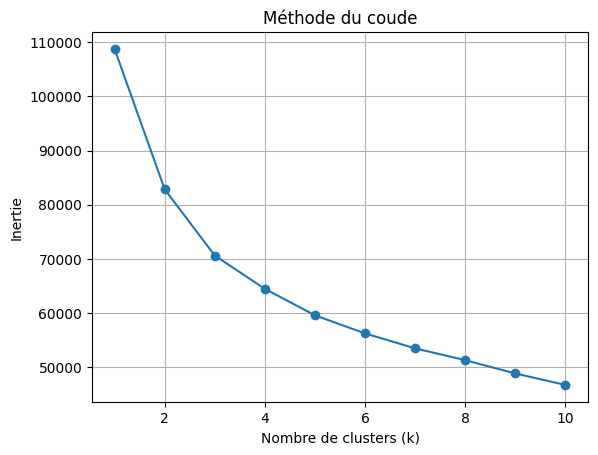

ValueError: Length of values (9888) does not match length of index (10000)

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Charger les données (tu peux adapter à ton fichier si besoin)
# df = pd.read_csv("ton_fichier.csv")  # Décommente si besoin

# 2. Prendre un échantillon de 10 000 lignes
df_sample = df.sample(n=10000, random_state=42)

# 3. Supprimer les colonnes non numériques
cols_to_drop = ['artist_name', 'track_name', 'track_id', 'genre', 'key', 'mode', 'time_signature']
df_cluster = df_sample.drop(columns=cols_to_drop)

# 4. Supprimer les valeurs manquantes et les doublons
df_cluster.dropna(inplace=True)
df_cluster.drop_duplicates(inplace=True)

# 5. Mise à l’échelle des données
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_cluster)

# 6. Méthode du coude pour choisir k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# 7. Afficher la courbe du coude
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.grid(True)
plt.show()

# 8. Appliquer KMeans avec k = 4 (ajuste selon la courbe du coude)
kmeans = KMeans(n_clusters=4, random_state=42)
df_sample['cluster'] = kmeans.fit_predict(scaled_data)

# 9. Réduction dimensionnelle pour visualiser en 2D
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# 10. Visualiser les clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df_sample['cluster'], alpha=0.6)
plt.title("Visualisation des clusters avec PCA")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.show()

# 11. Afficher les statistiques par cluster
cluster_stats = df_sample.groupby('cluster').mean(numeric_only=True)
print(cluster_stats)
